# Einführung OpenCV und Operation mit Python

In dieser Übung wollen wir OpenCV etwas genauer anschauen.


### Installation von OpenCV

Auf diesem Server is bereits alles notwendige installiert. Sie können das Notebook aber auch bei sich bearbeiten und danach wieder hochladen, wobei sie dann (neben jupyter) noch OpenCV installieren müssen.

OpenCV kann am einfachsten mit dem Python-Installer pip installiert werden. Je nach Umgebung oder aufgesetzter 
Python-Version ist das `pip` oder `pip3`. Wir werden in der Vorlesung mit Python Version 3.11 (oder später) arbeiten.

    pip install opencv-contrib-python

oder 

    pip3 install opencv-contrib-python

Dies installiert sowohl die Python Bindings-für OpenCV als auch die eigentliche OpenCV-Bibliothek. Falls Sie anaconda benutzen geht die Installation am besten über

    conda install opencv

### Dokumentation

- Die Dokumentation von OpenCV gibt es auf https://docs.opencv.org/4.5.5/.
- Die Dokumentationen von Python, Numpy und Matplotlib sollten über das Help-Menü in Jupyter erreichbar sein.


### Verwendung

Um OpenCV in Python verwenden zu können, muss die Bibliothek importiert werden. Für Berechnungen und Darstellung brauchen wir auch noch Numpy und Matplotlib:

In [1]:
# OpenCV needs to be included first

import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt

# this makes the images a bit larger

mpl.rcParams ['figure.dpi'] = 200
plt.rcParams ['figure.figsize'] = (10, 20)

# plots directly in the notebook

%matplotlib inline 

# if you have a high-dpi monitor

%config InlineBackend.figure_format = 'retina' 

path = '/exchange/cvai/images/'

### Bilder lesen

Für einige Operationen gibt es Implementationen sowohl in OpenCV als auch in anderen Python-Bibliotheken, zum Beispiel zum Lesen von Bildern. Wir werden, wenn immer möglich, zuerst die OpenCV-Implementation verwenden.

Ein Bild kann mit dem OpenCV Befehl `imread` gelesen werden:

In [2]:
image = cv2.imread (path + 'lena_std.tif')

OpenCV hat auch die Möglichkeit, ein Fenster zu öffnen, um ein Bild darin darzustellen. Innerhalb jupyter (d. h. im Browser) funktioniert dies im Allgemeinen nicht. Wir können aber ein Bild mit der Matplotlib-Bibliothek darstellen.

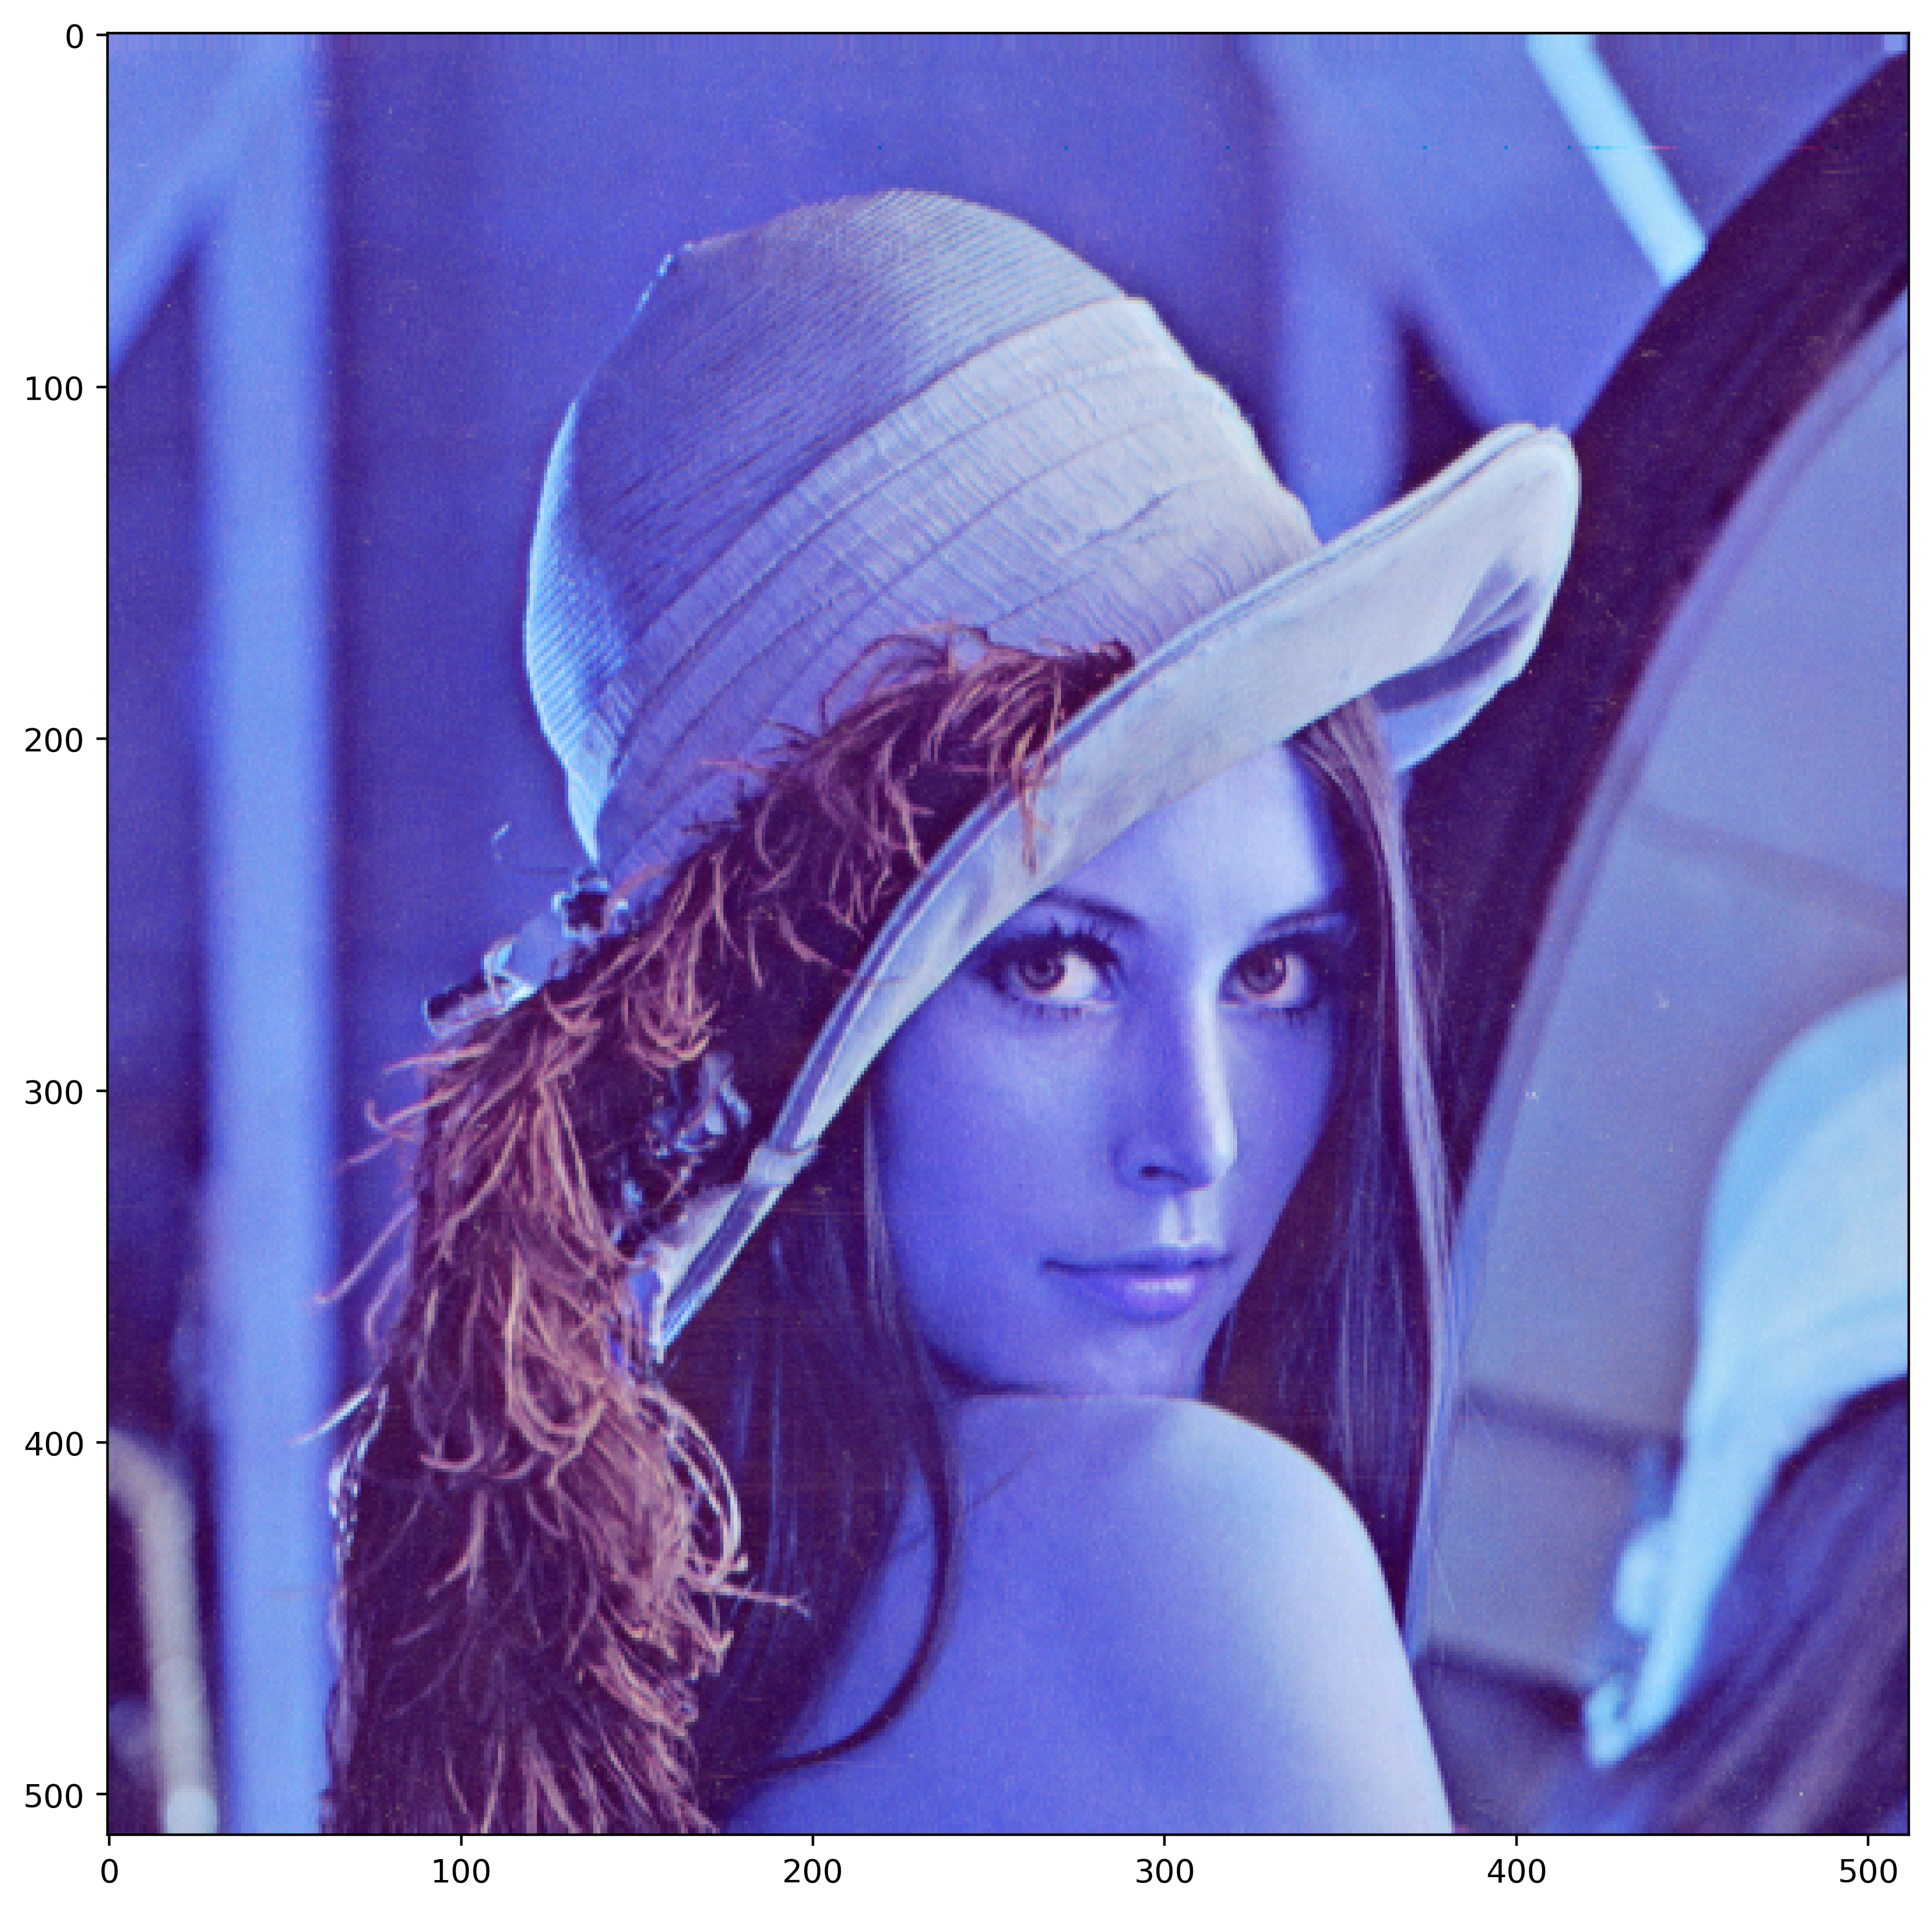

In [3]:
plt.imshow (image)

Wie wir sehen, sieht das Bild falsch aus. Das liegt daran, dass OpenCV das Bild im BGR-Format liest, die meisten anderen Bibliotheken aber Bilder im RGB-Format erwarten. Wir können das Bild entsprechend konvertieren und nochmals darstellen.

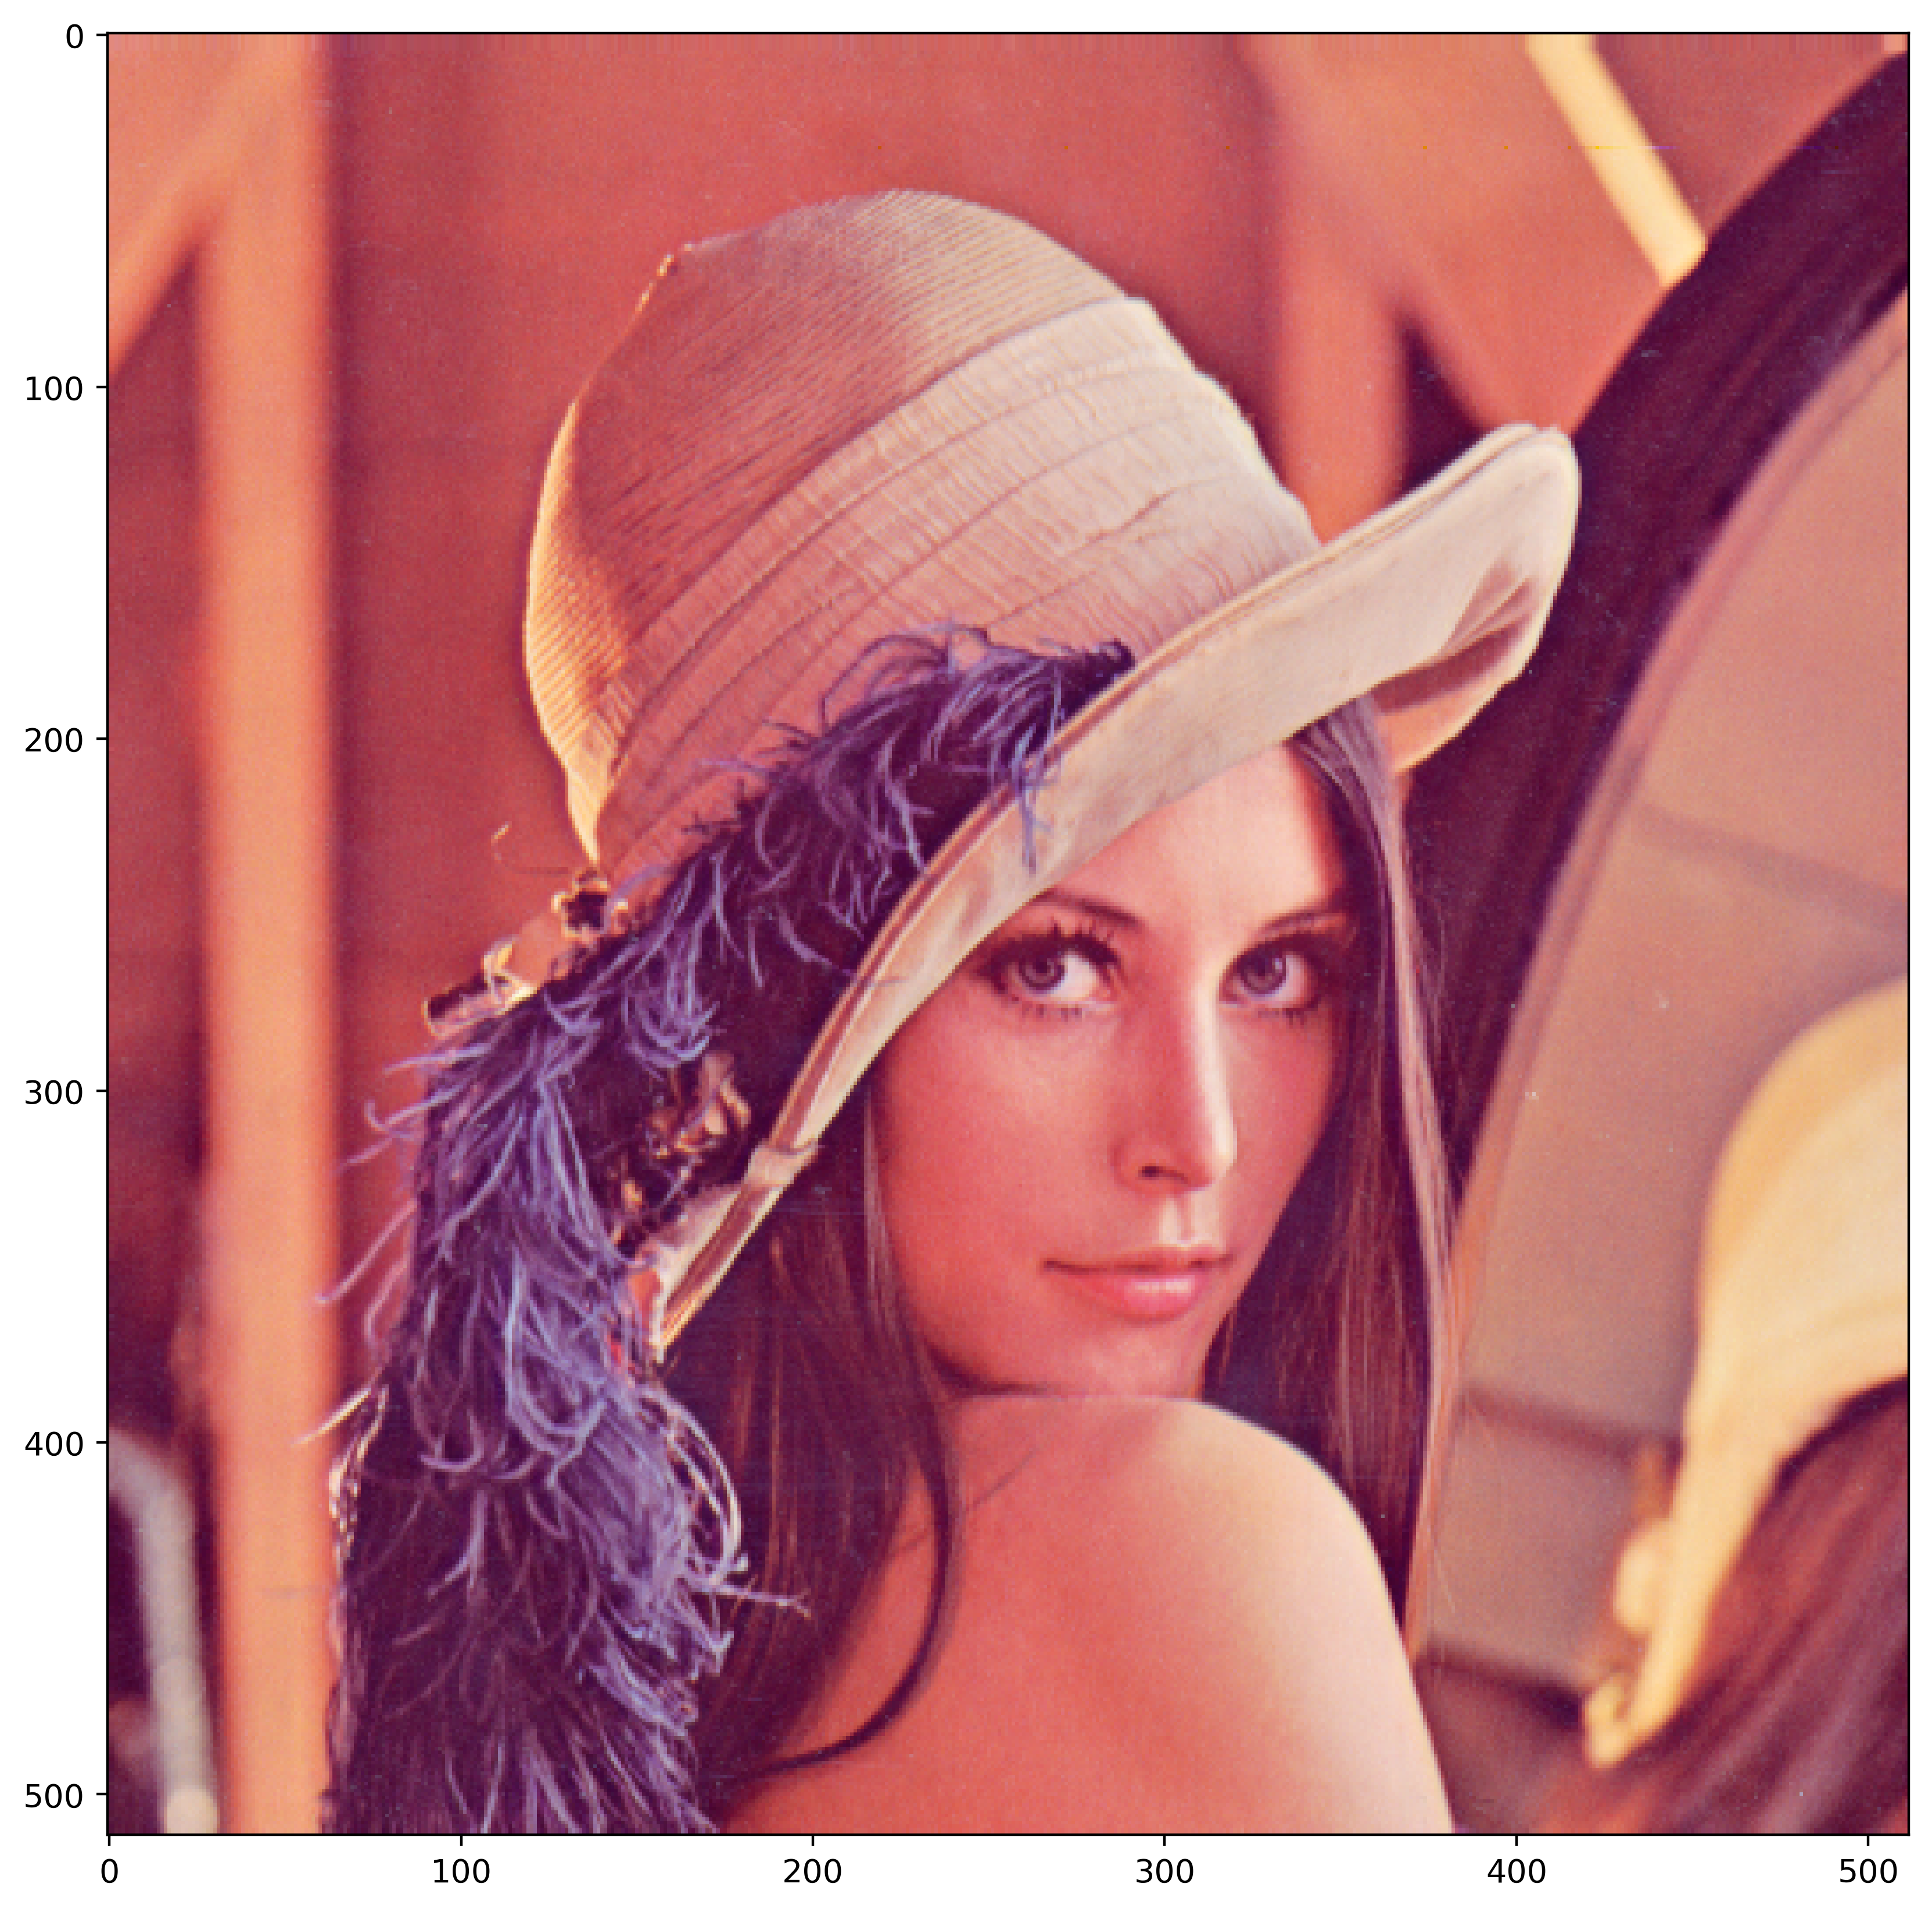

In [4]:
image_rgb = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)
plt.imshow (image_rgb)

### Numpy arrays

Intern ist ein Bild als ein dreidimensionales Numpy-Array abgelegt. Numpy-Arrays sind eine Erweiterung der normalen Python-Arrays auf mehrere Dimensionen und ermöglichen auch einfachere Operationen und Indexierung.

Ein einzelner Farbwert kann direkt über die Indexierung angesprochen werden, während die Verwendung von zwei Koordinaten die RGB-Werte als Array liefert.

In [5]:
print (image_rgb [0, 0, 0])
print (image_rgb [0,0])

226
[226 137 125]


Bildbereiche können auch direkt angesprochen werden. Die folgende Anweisung setzt einen Teil des Bildes auf weiss:

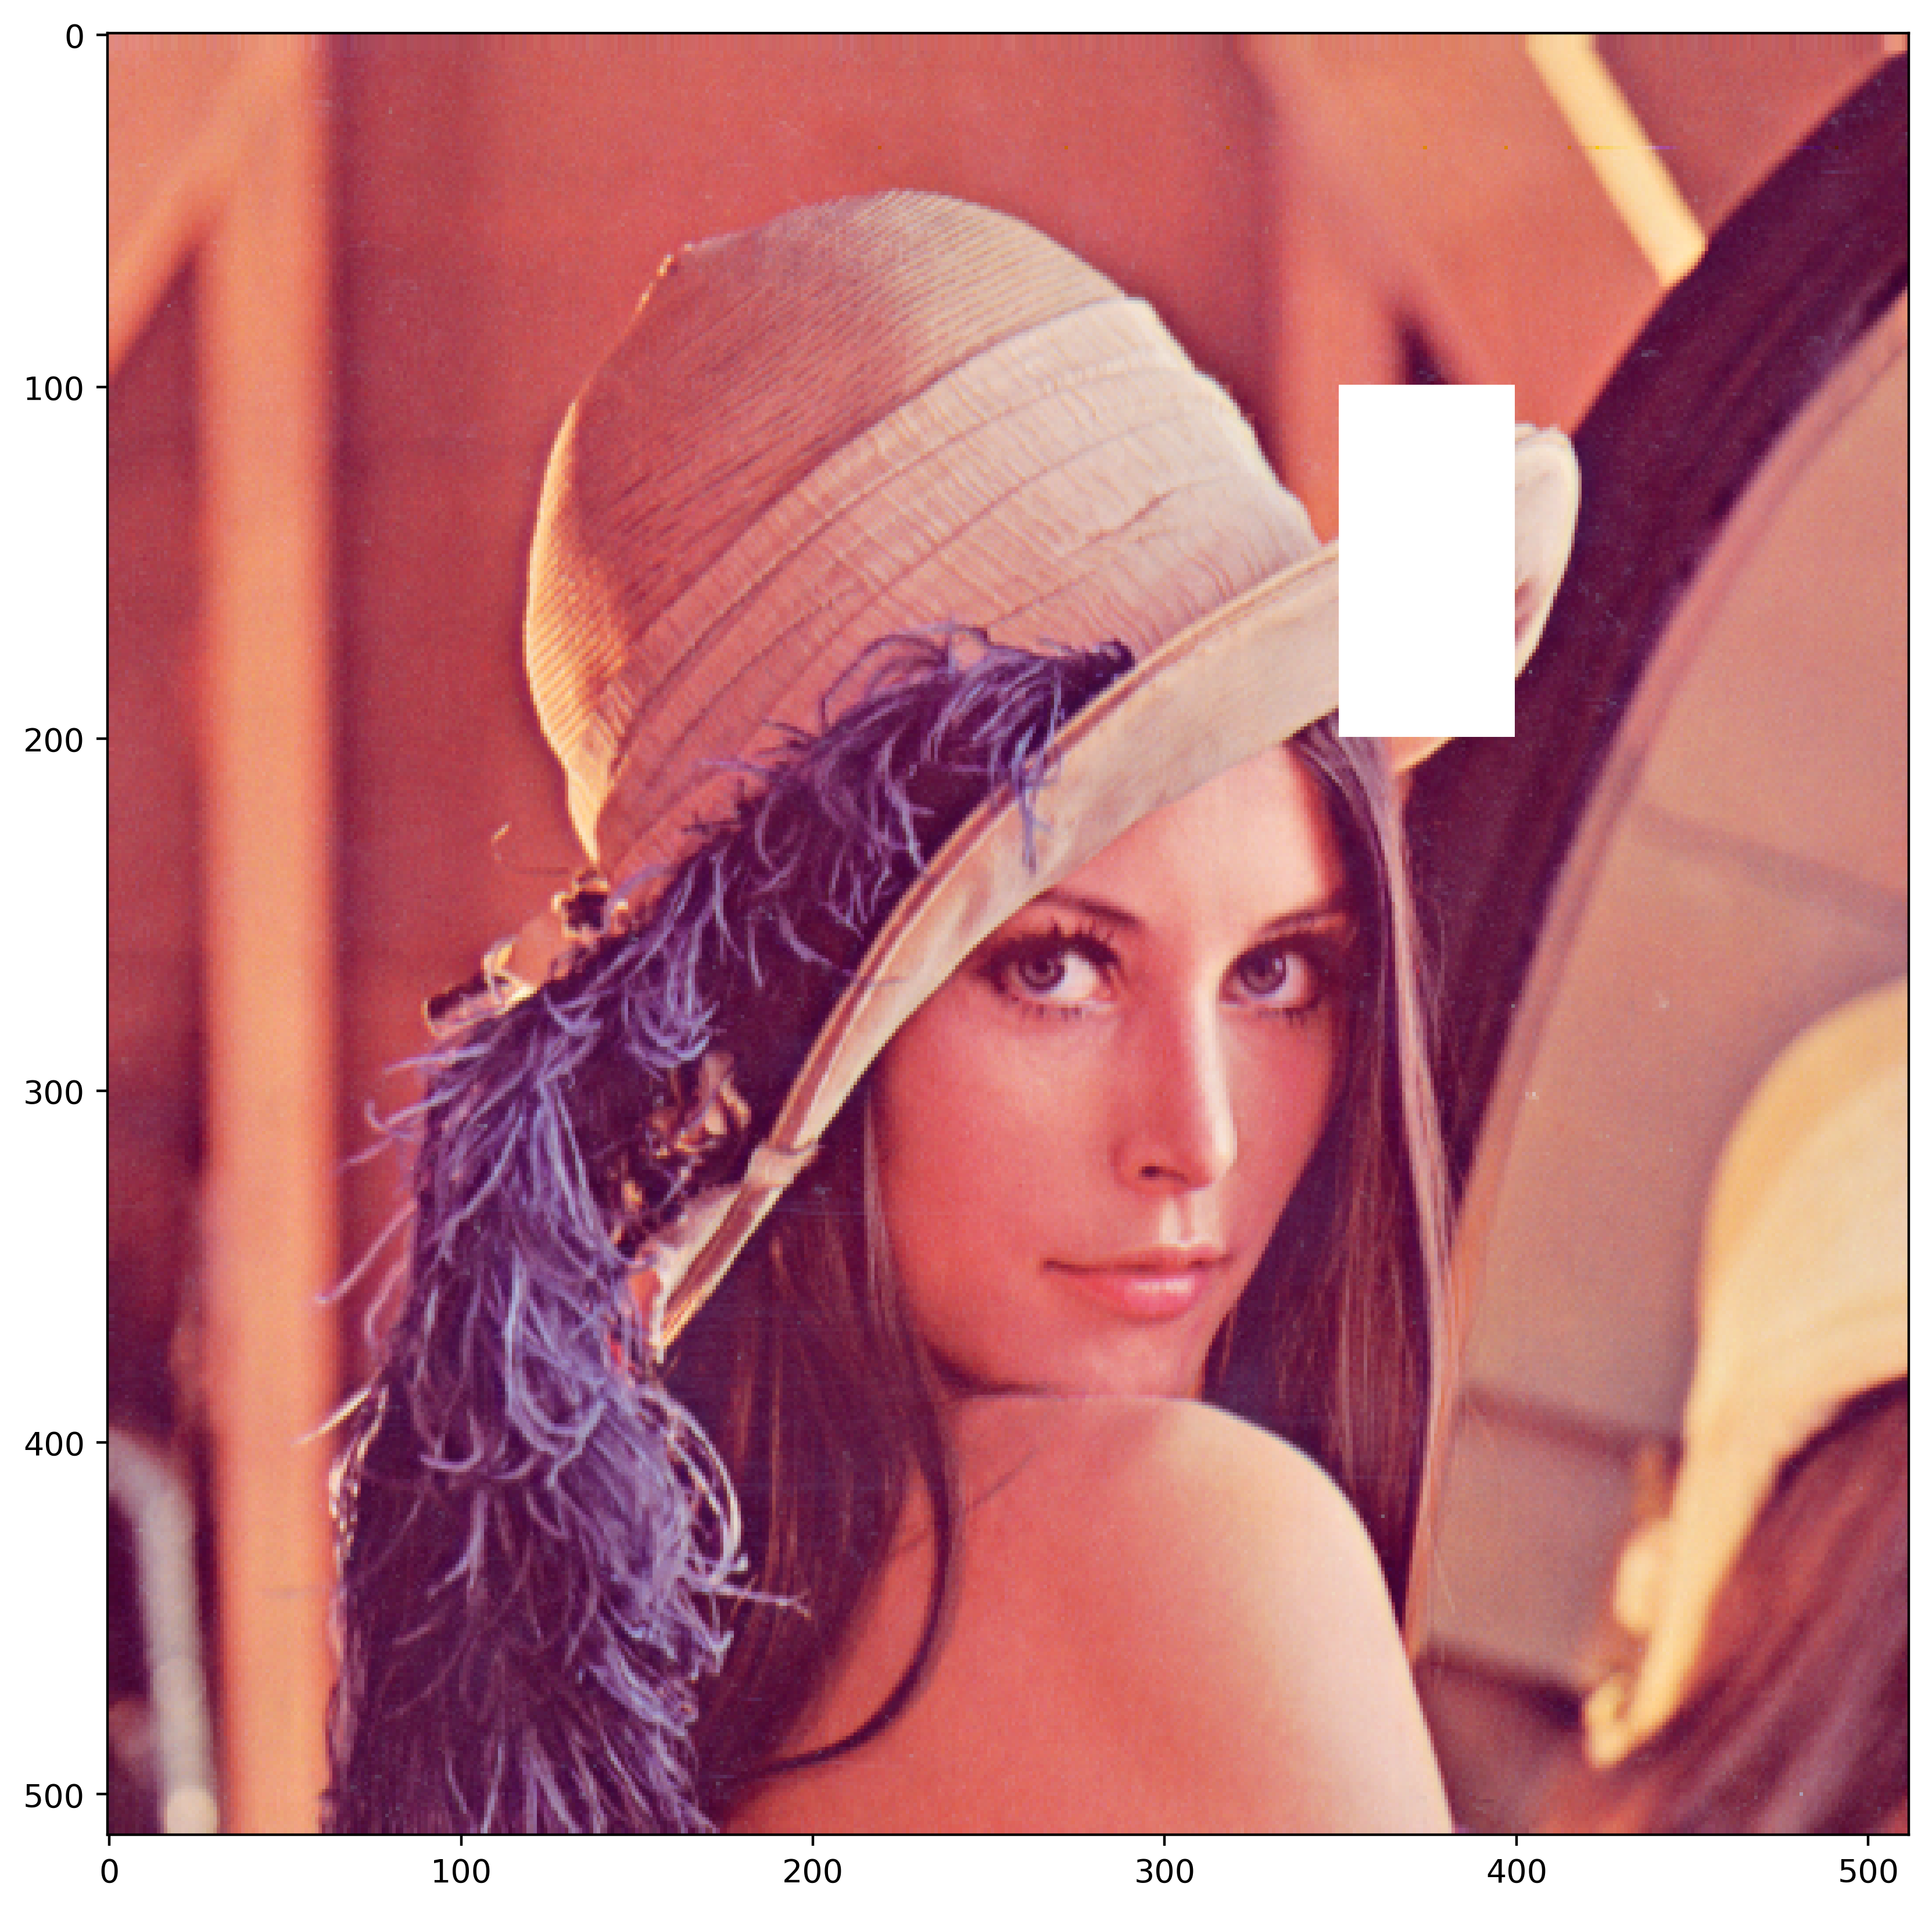

In [6]:
image_rgb [100:200, 350:400] = [255, 255, 255]
plt.imshow (image_rgb)

Schauen Sie sich dazu in der Numpy-Dokumentation die Möglichkeiten der Indexierung an. Eine Übesicht über
Numpy-Operationen gibt es auch auf

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf.

Beachten Sie: Die erste Koordinate in der Indexierung entspricht einer Zeile im numpy Array,
d. h. der y-Koordinate im Bild.

Mit Numpy-Arrays kann auch ein Boolean-Array als Index verwendet werden, ausserdem sind Operationen direkt auf einem ganzen Array möglich, z. B. um alle Pixel, die eine Helligkeit kleiner gleich 100 haben, auf Schwarz zu setzen:

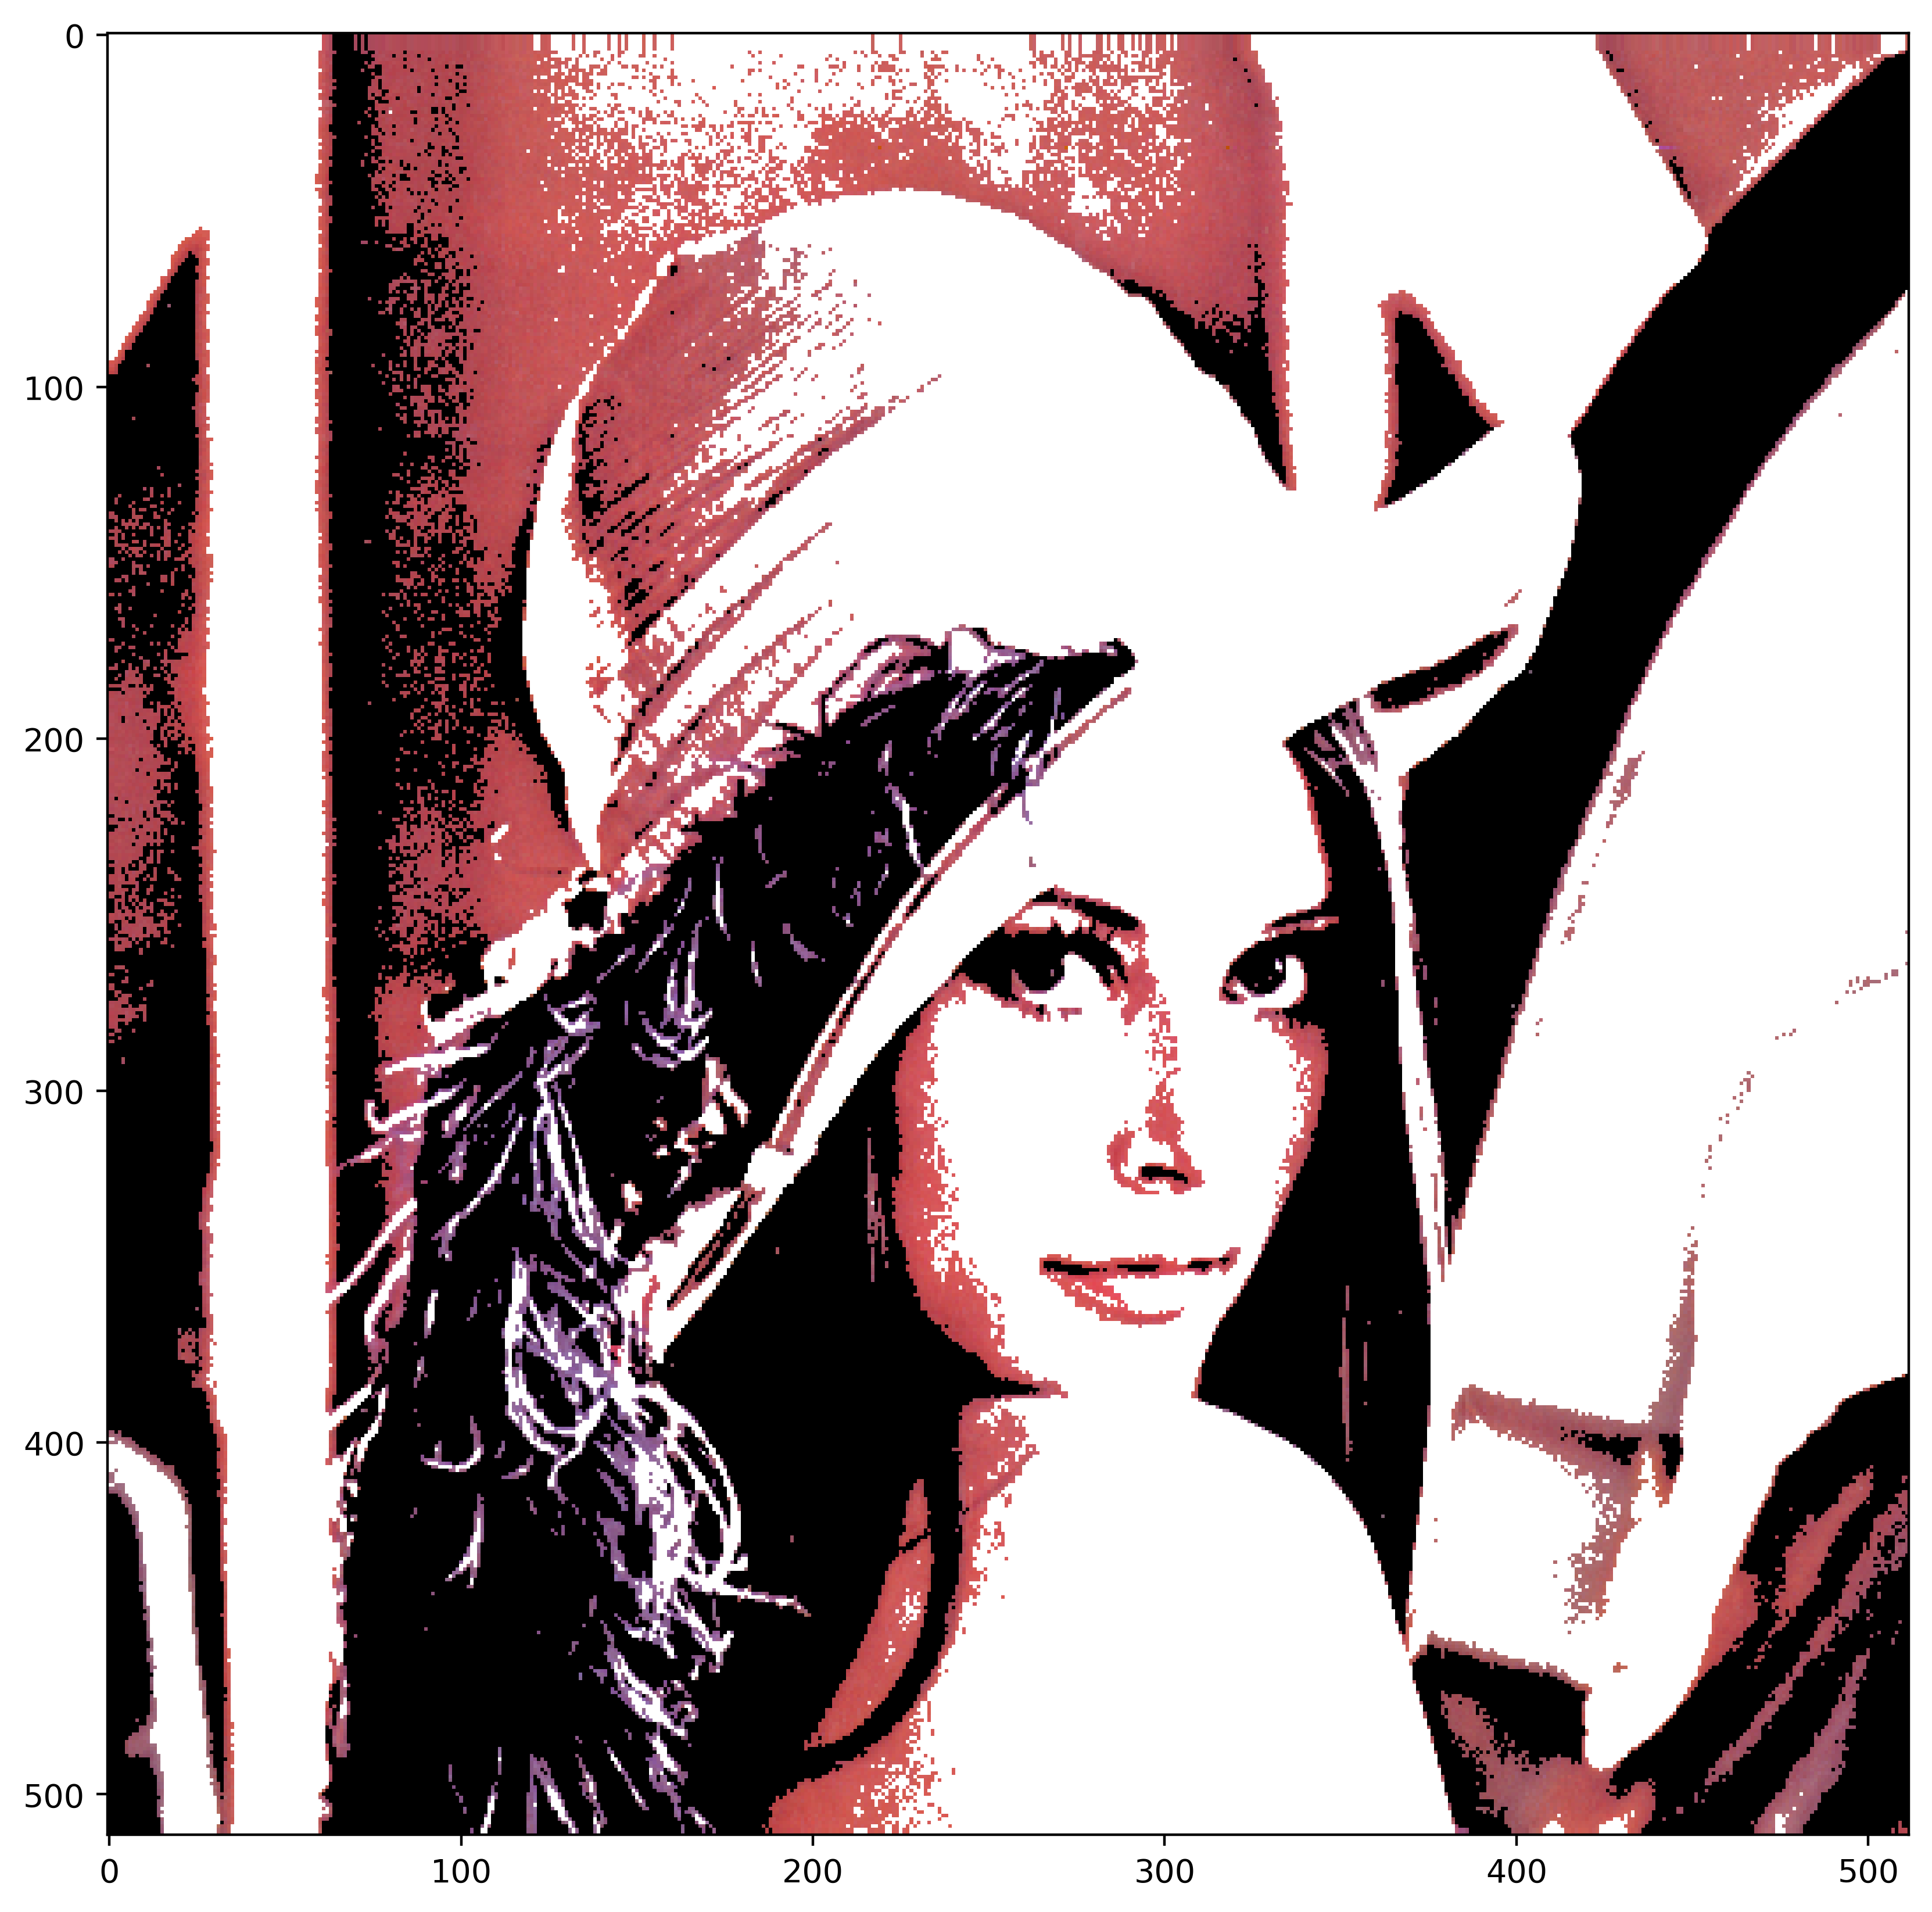

In [7]:
image_rgb = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)

threshold_map = image_grey <= 100

image_rgb [threshold_map] = [0, 0, 0]
image_rgb [image_grey > 128] = [255, 255, 255]

plt.imshow (image_rgb)

## Aufgabe 1: Bildmanipulationen mit OpenCV und Numpy 

### Einführung

In dieser Übung sollen einfache Bildoperationen mit OpenCV und Numpy durchgeführt werden.


### Aufgabe 1: Laden und Darstellung von Bildern

Schreiben Sie eine Funktion load_image, die das Bild liest und die Farbkanäle anpasst.

In [8]:
def load_image(name):
    return cv2.imread(name)

In [9]:
image = load_image(path + 'lena_std.tif')
assert image is not None
assert image[10,10,0] == 226

AssertionError: 

#### Spiegelung mit OpenCV

Spiegeln sie das Bild an der vertikalen und horizontalen Achse unter Benutzung von Funktionen aus OpenCV und stellen Sie die Bilder dar.

In [ ]:
image_mirror_vert = ...
image_mirror_hor = ...
plt.subplot (1, 2, 1); plt.imshow (image_mirror_vert)
plt.subplot (1, 2, 2); plt.imshow (image_mirror_hor)

#### Spiegeln mit Numpy

Sie können Bilder auch direkt mit numpy Befehlen verändern. Können sie sie auch damit spiegeln?

In [ ]:
def image_mirror_vert(image):
    # YOUR CODE HERE
    raise NotImplementedError()
    
def image_mirror_hor(image):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
image = load_image(path + 'lena_std.tif')
image_vert = image_mirror_vert(image)
image_hor = image_mirror_hor(image)
assert image_vert is not None
assert image_hor is not None
assert image_vert[-11,10,0] == 226
assert image_hor[10,-11,0] == 226

### Aufgabe 2: Darstellung von Grauwertbildern
Konvertieren Sie das Bild in ein Grauwertbild und stellen Sie dieses dar. Per default wird ein 1-Kanal-Bild farbig mit einer Default-Color-Map dargestellt. Um das Bild wirklich in grau zu zeichnen, kann der Parameter `cmap = 'gray'` für `imshow` mitgegeben werden.

In [ ]:
image_gray = ...

### Aufgabe 3: Bildkanäle

Stellen Sie die Anteile des roten, grünen und blauen Bildkanals einzeln (als Grauwertbild) dar. Mit `subplot` können sie verschiedene Bilder neben- oder untereinander darstellen.

In [ ]:
image_red = ...
image_green = ...
image_blue = ...
plt.subplot (1, 3, 1); plt.imshow (image_red, cmap = 'gray')
plt.subplot (1, 3, 2); plt.imshow (image_green, cmap = 'gray')
plt.subplot (1, 3, 3); plt.imshow (image_blue, cmap = 'gray')

Erstellen Sie nun wieder ein Farbbild aus den 3 Bildanälen. Sie können die Kanäle auch anders mischen. Verwenden Sie die numpy Funktion `stack`.

In [ ]:
image_new = ...

### Aufgabe 4: Plot einer Bildzeile

Stellen Sie die Bildwerte der Zeile 200 des Grauwertbildes als Plot dar. Dazu müssen sie die Pixelwerte einer Zeile auslesen, wobei Sie wiederum ein (1D-) Numpy-Array erhalten. Dieses kann mit `plt.plot (...)` dargestellt werden. Entspricht das Ergebnis den Erwartungen?

In [ ]:
line = ...
plt.plot (line)

### Aufgabe 5: Histogramm und Histogrammausgleich

Das folgenden Bild hat einen schlechten Kontrast. Grauwertbilder werden per default von OpenCV als 3-Kanal-Bilder geladen. Was ist der minimale und maximale Pixelwert im Bild?

In [ ]:
einstein = cv2.imread (path + 'EinsteinLowContrast.tif')
einstein_grey = cv2.cvtColor (einstein, cv2.COLOR_BGR2GRAY)
plt.imshow (einstein, cmap = 'gray')

min = ...
max = ...
print ('min: {}, max: {}' .format (min, max))

Stellen Sie das Histogramm des Bildes dar. Benutzen Sie dazu die OpenCV Funktion `cv2.calcHist (...)`. Benutzen Sie die OpenCV-Dokumentation, um die Parameter der Funktion zu ermitteln.

In [ ]:
hist =  ...
plt.plot (hist)

Führen Sie einen Histogrammausgleich mit der Funktion `equalizeHist(...)` durch und stellen Sie das Bild und das Histogram des veränderten Bildes dar.

In [ ]:
einstein_equal = ...
hist2 = ...
plt.subplot (1, 2, 1); plt.plot (hist2)
plt.subplot (1, 2, 2); plt.imshow (np.stack ([einstein_equal, einstein_equal, einstein_equal], axis = 2))

### Aufgabe 6: Punktbildfunktionen

In der nächsten Zelle ist eine Funktion definiert, die als Eingabe ein Bild enthält und ein verändertes Bild zurückgibt. Ändern Sie die Funktion, sodass das Bild heller (oder dunkler) wird.

In [ ]:
def f(x):
    # change function to make pixesl brighter (or darker)
    return x

In [ ]:
result = f (einstein_grey)

## Aufgabe 2: Morphologische Operationen

### Einführung

In dieser Aufgabe wollen wir morphologische Operationen in OpenCV betrachten.


In [ ]:
# OpenCV needs to be included first

import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams ['figure.dpi'] = 200

### Aufgabe 2.1: Dilate and Erode

Morphologische Operationen werden typischerweise auf binären Bildern angewendet. (Die OpenGL-Implementationen verwenden jeweils die Maximum-Operationen zwischen Strukturelement und Bild, sodass die Operationen zumindest auch auf Grauwert Bildern durchgeführt werden können, ausserdem werden die Operationen auf allen Kanälen angewendet).

Ein Beispiel Bild steht unter images/Figuren.png zur Verfügung. Typischerweise erhalten sie ein binäres Bild sonst mit einer Schwellwert- (Threshold-) Operation.

In [ ]:
image = cv2.imread (path + 'Figuren.png')
plt.imshow (image)


Wenden Sie die morphologischen Operationen dilate und erode mit verschiedenen Strukturelementen und verschiedenen Grössen an. Strukturelemente können mit der Funktion `getStructuringElement` erzeugt werden. Die OpenGL Implementation erlaubt es auch, die Operationen mit einem Aufruf mehrmals anzuwenden.

In [ ]:
struct = cv2.getStructuringElement (...)
plt.imshow (struct, cmap='gray')

In [ ]:
image_dilate = ...
plt.imshow(image_dilate)

In [ ]:
image_erode = ...
plt.imshow(image_erode)

### Aufgabe 2.2: Opening/Closing


Für Opening und Closing kann in OpenCV die Funktion `morphologyEx` verwendet werden. Wie wirkt sich opening and closing auf das Beispielbild aus?

In [ ]:
image_open = cv2.morphologyEx (...)
plt.imshow (image_open)  

In [ ]:
image_close = cv2.morphologyEx (...)
plt.imshow (image_close)  

### Aufgabe 2.3: Kugeln zählen

Finden Sie eine Sequenz von OpenCV-Operationen, die die Kugeln im Bild 'images/Kugeln.jpg' Bild zählt? Als Ausgabe sollten sie dann also schlussendlich eine Zahl zurückgeben.

Hinweis: Beachten Sie, dass die Kugeln schwarz auf hellem Hintergrund dargestellt sind.

In [ ]:
mpl.rcParams['figure.dpi']= 200
def count_circles(image):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
image = load_image(path + 'Kugeln.jpg')
plt.imshow(image)

In [ ]:
num_kugeln = count_circles(image)
assert num_kugeln == 77